# Try to reproduce Graph 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution, curve_fit

In [2]:
# Constants
k_B = 1.38e-23  # Boltzmann constant in J/K
T = 298  # Temperature in Kelvin
sigma = 0.0098  # Surface tension in dyne/cm converted to J/m²
a = 270e-9  # Droplet radius in meters
xi = 0.15  # Dimensionless parameter
epsilon_r = 78.5  # Relative permittivity of water
epsilon_0 = 8.85e-12  # Permittivity of vacuum in F/m
psi_0 = 270e-3  # Surface potential in volts
lambda_D = 3.4e-9  # Debye length in meters
phi_c = 0.646  # Critical volume fraction
alpha = 0.85  # Shear effect parameter
V_drop = (4/3) * np.pi * a**3  # Droplet volume


In [3]:
# Modify energy per droplet calculation functions to return values in units of k_B*T
def F_int(phi_d):
    return 4 * np.pi * xi * sigma * (a**2) * (phi_d**2) / (k_B * T)

def F_ent(phi, phi_d, gamma):
    return -3 * np.log(phi_c + phi_d - phi - alpha * gamma**2)

def F_elec(phi_d, phi):
    h = 2 * a * ((phi_c + phi_d) ** (1/3) * phi ** (-1/3) - 1)
    return 2 * np.pi * (a**2) * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h / lambda_D) / (h * k_B * T)

# Total free energy per droplet function in units of k_B*T
def F_tot(phi_d, phi, gamma):
    return F_int(phi_d) + F_ent(phi, phi_d, gamma) + F_elec(phi_d, phi)

In [4]:
def find_phi_d(phi, gamma):
    if phi <= phi_c:
        lower_bound = 0
    else:
        lower_bound = phi - phi_c
    bounds = [(lower_bound, phi_c)]
    
    def F_tot_wrapper(phi_d):
        return F_tot(phi_d[0], phi, gamma)
    
    result = differential_evolution(F_tot_wrapper, bounds=bounds)
    return result.x[0] if result.success else np.nan


In [5]:
# Calculate values for plotting with gamma variable
phi_values = np.linspace(0.45, 0.85, 10)  # Fewer phi points to keep the calculation simple
gamma_range = np.linspace(0, 0.01, 50)  # Gamma values from 0 to 0.01 for fitting

phi_d_values = []

/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_924/4164629982.py:6: RuntimeWarning: divide by zero encountered in log
  return -3 * np.log(phi_c + phi_d - phi - alpha * gamma**2)
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_924/4164629982.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  return 2 * np.pi * (a**2) * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h / lambda_D) / (h * k_B * T)


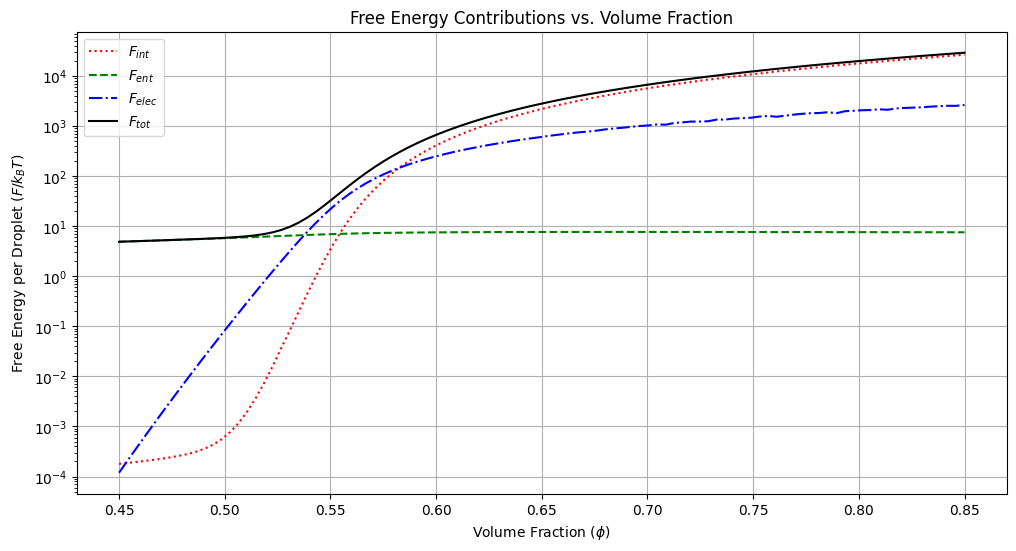

In [6]:
# Minimize F_tot to find phi_d* for a given phi and gamma
def find_phi_d(phi, gamma):
    if phi <= phi_c:
        lower_bound = 0
    else:
        lower_bound = phi - phi_c
    bounds = [(lower_bound, phi_c)]
    
    def F_tot_wrapper(phi_d):
        return F_tot(phi_d[0], phi, gamma)
    
    result = differential_evolution(F_tot_wrapper, bounds=bounds)
    return result.x[0] if result.success else np.nan

# Define phi values and gamma
phi_values = np.linspace(0.45, 0.85, 100)
gamma = 0  # Assuming gamma is fixed for this calculation

# Calculate phi_d*, and use it to compute the energies
phi_d_values = [find_phi_d(phi, gamma) for phi in phi_values]

# Now calculate the energy components for each phi_d*
F_int_values = [F_int(phi_d) for phi_d in phi_d_values]
F_ent_values = [F_ent(phi, phi_d, gamma) for phi, phi_d in zip(phi_values, phi_d_values)]
F_elec_values = [F_elec(phi_d, phi) for phi_d, phi in zip(phi_d_values, phi_values)]
F_tot_values = [F_int + F_ent + F_elec for F_int, F_ent, F_elec in zip(F_int_values, F_ent_values, F_elec_values)]

# Plotting the energies per droplet in units of k_B*T
plt.figure(figsize=(12, 6))
plt.plot(phi_values, F_int_values, label='$F_{int}$', linestyle='dotted', color='red')
plt.plot(phi_values, F_ent_values, label='$F_{ent}$', linestyle='dashed', color='green')
plt.plot(phi_values, F_elec_values, label='$F_{elec}$', linestyle='dashdot', color='blue')
plt.plot(phi_values, F_tot_values, label='$F_{tot}$', linestyle='solid', color='black')
plt.yscale('log')  # Log scale to match the figure from the paper
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Free Energy per Droplet ($F/k_B T$)')
plt.title('Free Energy Contributions vs. Volume Fraction')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_924/4164629982.py:6: RuntimeWarning: divide by zero encountered in log
  return -3 * np.log(phi_c + phi_d - phi - alpha * gamma**2)
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_924/4164629982.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  return 2 * np.pi * (a**2) * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h / lambda_D) / (h * k_B * T)
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_924/4164629982.py:6: RuntimeWarning: invalid value encountered in log
  return -3 * np.log(phi_c + phi_d - phi - alpha * gamma**2)


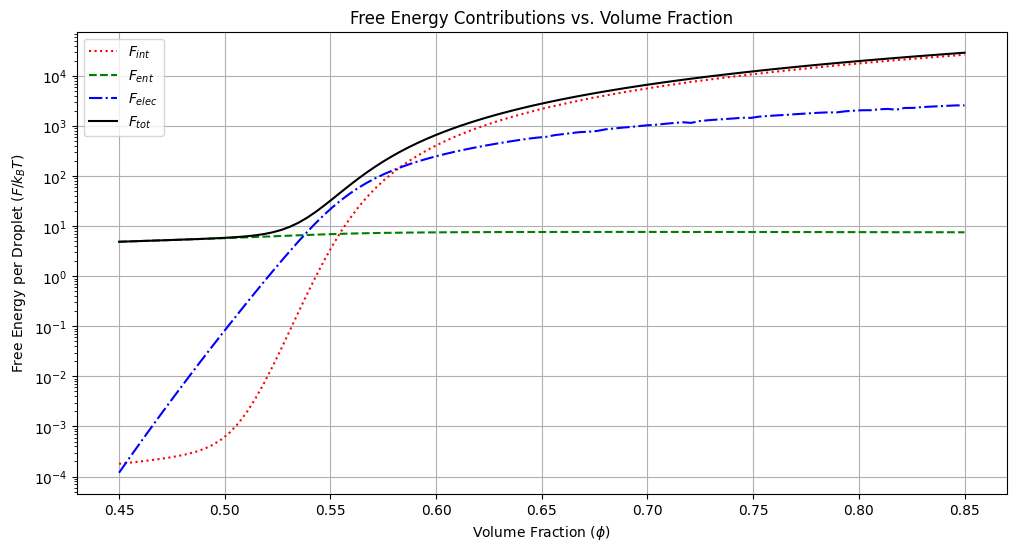

In [7]:
# Minimize F_tot to find phi_d* for a given phi and gamma
def find_phi_d(phi, gamma):
    if phi <= phi_c:
        lower_bound = 0
    else:
        lower_bound = phi - phi_c
    bounds = [(lower_bound, phi_c)]
    
    def F_tot_wrapper(phi_d):
        return F_tot(phi_d[0], phi, gamma)
    
    result = differential_evolution(F_tot_wrapper, bounds=bounds)
    return result.x[0] if result.success else np.nan

# Define phi values and gamma range
phi_values = np.linspace(0.45, 0.85, 100)
gamma_range = np.linspace(0, 0.01, 50)  # Small range of gamma values

# Initialize lists to store results
phi_d_gamma_values = []  # To store phi_d* for each phi and gamma
F_tot_gamma_values = []  # To store F_tot for each phi and gamma

# Loop over each phi value
for phi in phi_values:
    phi_d_for_gammas = []
    F_tot_for_gammas = []
    
    # Loop over each gamma value to calculate phi_d* and F_tot
    for gamma in gamma_range:
        # Find phi_d* for the current gamma
        phi_d_star = find_phi_d(phi, gamma)
        phi_d_for_gammas.append(phi_d_star)
        
        # Calculate F_tot using the found phi_d*
        F_tot_val = F_tot(phi_d_star, phi, gamma)
        F_tot_for_gammas.append(F_tot_val)
    
    # Store results for the current phi
    phi_d_gamma_values.append(phi_d_for_gammas)
    F_tot_gamma_values.append(F_tot_for_gammas)

# Now that we have phi_d* and F_tot for each (phi, gamma), let's compute the energy contributions

F_int_values = [F_int(phi_d[-1]) for phi_d in phi_d_gamma_values]  # Use last gamma value (gamma close to 0.01)
F_ent_values = [F_ent(phi, phi_d[-1], gamma_range[-1]) for phi, phi_d in zip(phi_values, phi_d_gamma_values)]
F_elec_values = [F_elec(phi_d[-1], phi) for phi, phi_d in zip(phi_values, phi_d_gamma_values)]
F_tot_values = [F_int + F_ent + F_elec for F_int, F_ent, F_elec in zip(F_int_values, F_ent_values, F_elec_values)]

# Plotting the energies per droplet in units of k_B*T
plt.figure(figsize=(12, 6))
plt.plot(phi_values, F_int_values, label='$F_{int}$', linestyle='dotted', color='red')
plt.plot(phi_values, F_ent_values, label='$F_{ent}$', linestyle='dashed', color='green')
plt.plot(phi_values, F_elec_values, label='$F_{elec}$', linestyle='dashdot', color='blue')
plt.plot(phi_values, F_tot_values, label='$F_{tot}$', linestyle='solid', color='black')
plt.yscale('log')  # Log scale to match the figure from the paper
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Free Energy per Droplet ($F/k_B T$)')
plt.title('Free Energy Contributions vs. Volume Fraction')
plt.legend()
plt.grid(True)
plt.show()

# Graph 11

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, differential_evolution
from scipy.ndimage import gaussian_filter1d  

# Constants
k_B = 1.38e-23  # Boltzmann constant in J/K
T = 298  # Temperature in Kelvin
sigma = 0.0098  # Surface tension in J/m²
a = 270e-9  # Droplet radius in meters
xi = 0.15  # Dimensionless parameter
epsilon_r = 78.5  # Relative permittivity of water
epsilon_0 = 8.85e-12  # Permittivity of vacuum in F/m
psi_0 = 270e-3  # Surface potential in volts
lambda_D = 3.4e-9  # Debye length in meters
phi_c = 0.646  # Critical volume fraction
alpha = 0.85  # Shear effect parameter
V_drop = (4/3) * np.pi * a**3  # Droplet volume



In [9]:
def F_int(phi_d):
    return 4 * np.pi * xi * sigma * (a**2) * (phi_d**2)


def F_ent(phi, phi_d, gamma):
    return -3 * k_B * T * np.log(phi_c + phi_d - phi - alpha * gamma**2)


def F_elec(phi_d, phi, gamma):
    h = 2 * (phi_c ** (1/3)) * a * (phi ** (-1/3) - (phi_c + phi_d - alpha * gamma**2) ** (-1/3))
    return 2 * np.pi * (a**2) * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h / lambda_D) / h


def F_tot(phi_d, phi, gamma):
    return F_int(phi_d) + F_ent(phi, phi_d, gamma) + F_elec(phi_d, phi, gamma)


## 以下部分有误

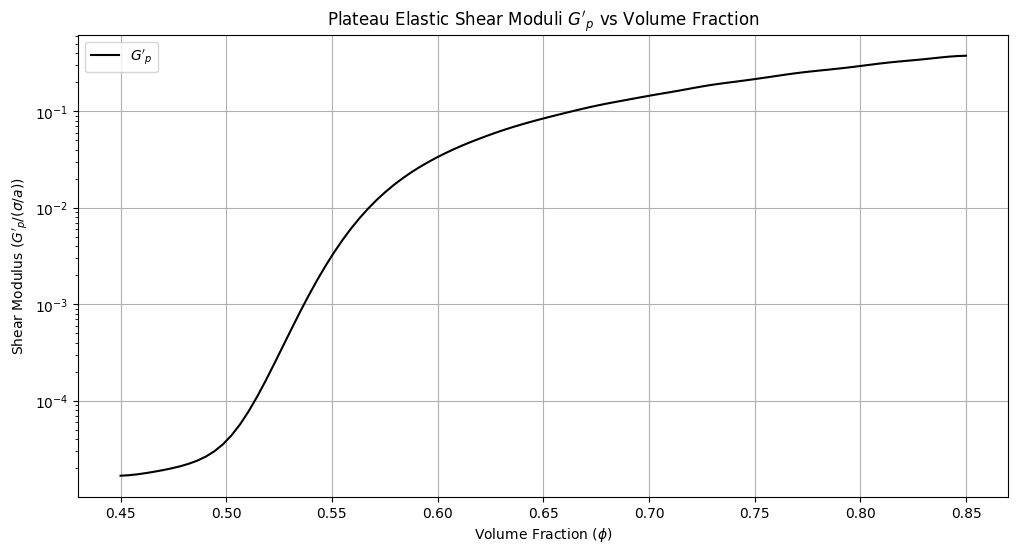

In [10]:

# Minimize F_tot to find phi_d* for a given phi
def find_phi_d_and_gamma(phi):
    if phi <= phi_c:
        lower_bound_phi_d = 0
    else:
        lower_bound_phi_d = phi - phi_c
    bounds = [(lower_bound_phi_d, phi_c), (0, 0.01)]  # gamma 在 0 到 0.01

    def F_tot_wrapper(params):
        phi_d, gamma = params
        return F_tot(phi_d, phi, gamma)

    result = differential_evolution(F_tot_wrapper, bounds=bounds, seed=10, maxiter=100)
    
    return result.x if result.success else (np.nan, np.nan)


def quadratic_fit(gamma, a, b, c):
    return a * gamma**2 + b * gamma + c


phi_values = np.linspace(0.45, 0.85, 100)  
G_p_tot = []  


# Calculate G'_p
for phi in phi_values:
    # Find optimal phi_d and gamma
    phi_d_opt, gamma_opt = find_phi_d_and_gamma(phi)
    
    if np.isnan(phi_d_opt) or np.isnan(gamma_opt):
        continue  # Skip if optimization failed
    
    # Use a fixed range of gamma around 0 for fitting
    gamma_range = np.linspace(0, 0.01, 100)  # Keep the range fixed around 0 to 0.01
    F_tot_gamma = [F_tot(phi_d_opt, phi, gamma) for gamma in gamma_range]
    
    # Perform quadratic fit
    popt_tot, _ = curve_fit(quadratic_fit, gamma_range, F_tot_gamma)
    
    # Calculate curvature and G'_p
    curvature_tot = popt_tot[0] * 2  # Multiply by 2 to get the actual second derivative
    G_p_tot.append((phi / V_drop) * curvature_tot / (sigma / a))

# Smooth the results
G_p_tot_smooth = gaussian_filter1d(G_p_tot, sigma=2)


plt.figure(figsize=(12, 6))
plt.plot(phi_values[:len(G_p_tot_smooth)], G_p_tot_smooth, label='$G\'_p$', linestyle='solid', color='black')
plt.yscale('log')
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Shear Modulus ($G\'_p / (\\sigma/a)$)')
plt.title('Plateau Elastic Shear Moduli $G\'_p$ vs Volume Fraction')
plt.legend()
plt.grid(True)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


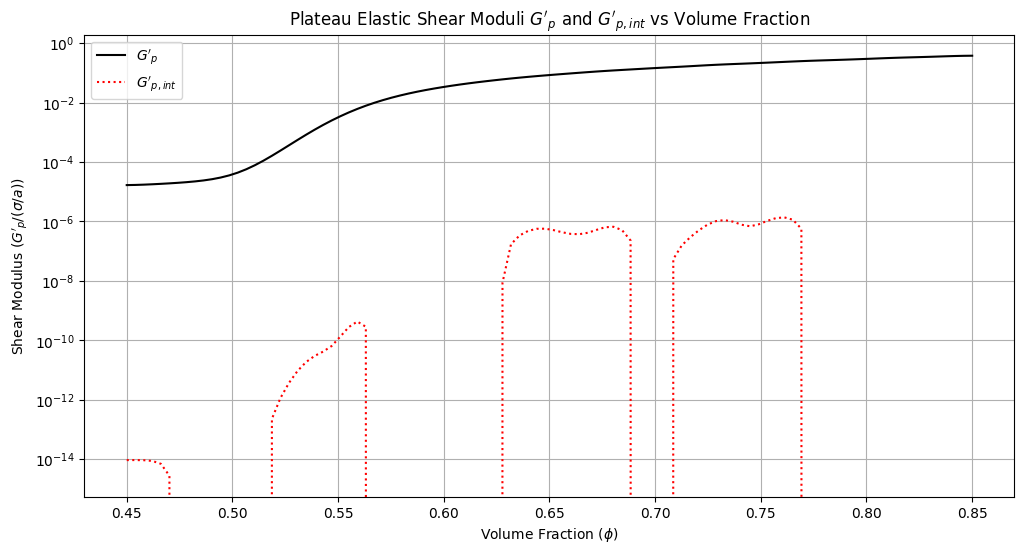

In [11]:
# Interface free energy (units of J)
def F_int(phi_d):
    return 4 * np.pi * xi * sigma * (a**2) * (phi_d**2)

# Quadratic fit function remains the same
def quadratic_fit(gamma, a, b, c):
    return a * gamma**2 + b * gamma + c

# Calculate G'_p for the interface contribution (G'_p,int)
G_p_int = []  # 存储界面自由能的 G'_p

# Loop over each phi value
for phi in phi_values:
    # Find optimal phi_d and gamma
    phi_d_opt, gamma_opt = find_phi_d_and_gamma(phi)
    
    if np.isnan(phi_d_opt) or np.isnan(gamma_opt):
        continue  # Skip if optimization failed
    
    # Use a fixed range of gamma around 0 for fitting
    gamma_range = np.linspace(0, 0.01, 100)  # Keep the range fixed around 0 to 0.01
    F_int_gamma = [F_int(phi_d_opt) for gamma in gamma_range]  # 只考虑界面自由能
    
    # Perform quadratic fit
    popt_int, _ = curve_fit(quadratic_fit, gamma_range, F_int_gamma)
    
    # Calculate curvature and G'_p,int
    curvature_int = popt_int[0] * 2  # Multiply by 2 to get the actual second derivative
    G_p_int.append((phi / V_drop) * curvature_int / (sigma / a))

# Smooth the results for G'_p,int
G_p_int_smooth = gaussian_filter1d(G_p_int, sigma=2)

# Plot the results (Total G'_p and G'_p,int)
plt.figure(figsize=(12, 6))
plt.plot(phi_values[:len(G_p_tot_smooth)], G_p_tot_smooth, label='$G\'_p$', linestyle='solid', color='black')
plt.plot(phi_values[:len(G_p_int_smooth)], G_p_int_smooth, label='$G\'_{p,int}$', linestyle='dotted', color='red')
plt.yscale('log')
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Shear Modulus ($G\'_p / (\\sigma/a)$)')
plt.title('Plateau Elastic Shear Moduli $G\'_p$ and $G\'_{p,int}$ vs Volume Fraction')
plt.legend()
plt.grid(True)
plt.show()


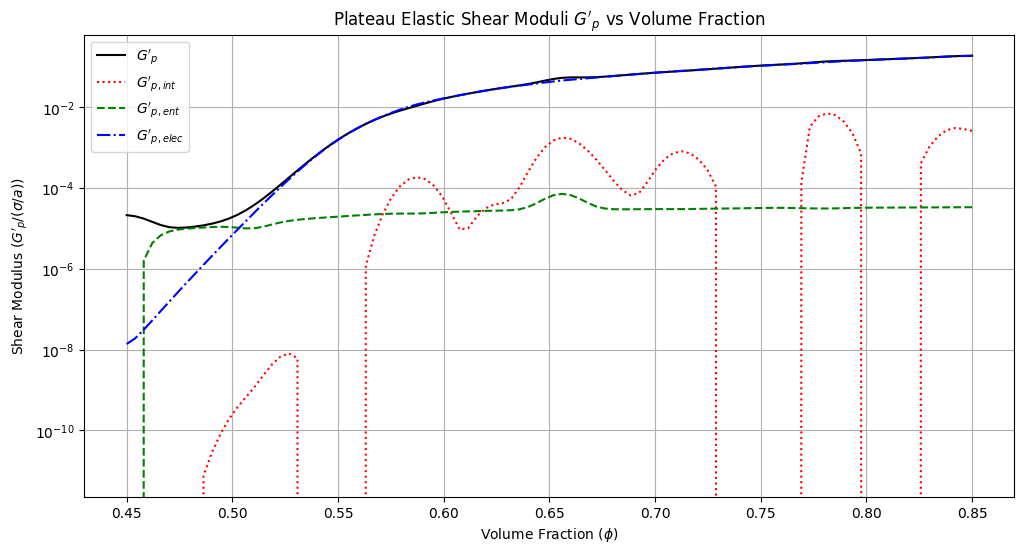

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, differential_evolution
from scipy.ndimage import gaussian_filter1d  # 用于平滑处理

# Constants
k_B = 1.38e-23  # Boltzmann constant in J/K
T = 298  # Temperature in Kelvin
sigma = 0.0098  # Surface tension in J/m²
a = 270e-9  # Droplet radius in meters
xi = 0.15  # Dimensionless parameter
epsilon_r = 78.5  # Relative permittivity of water
epsilon_0 = 8.85e-12  # Permittivity of vacuum in F/m
psi_0 = 270e-3  # Surface potential in volts
lambda_D = 3.4e-9  # Debye length in meters
phi_c = 0.646  # Critical volume fraction
alpha = 0.85  # Shear effect parameter
V_drop = (4/3) * np.pi * a**3  # Droplet volume

# Interface free energy (units of J)
def F_int(phi_d):
    return 4 * np.pi * xi * sigma * (a**2) * (phi_d**2)

# Entropic free energy (units of J)
def F_ent(phi, phi_d, gamma):
    return -3 * k_B * T * np.log(phi_c + phi_d - phi - alpha * gamma**2)

# Electrostatic free energy (units of J)
def F_elec(phi_d, phi, gamma):
    h = 2 * (phi_c ** (1/3)) * a * (phi ** (-1/3) - (phi_c + phi_d - alpha * gamma**2) ** (-1/3))
    return 2 * np.pi * (a**2) * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h / lambda_D) / h

# Total free energy per droplet in units of J (energy)
def F_tot(phi_d, phi, gamma):
    return F_int(phi_d) + F_ent(phi, phi_d, gamma) + F_elec(phi_d, phi, gamma)

# Minimize F_tot to find phi_d* for a given phi
def find_phi_d_and_gamma(phi):
    # Set bounds for phi_d and gamma
    if phi <= phi_c:
        lower_bound_phi_d = 0
    else:
        lower_bound_phi_d = phi - phi_c
    bounds = [(lower_bound_phi_d, phi_c), (0, 0.01)]  # phi_d 和 gamma 的范围

    # 自由能最小化的包装函数
    def F_tot_wrapper(params):
        phi_d, gamma = params
        return F_tot(phi_d, phi, gamma)

    # 使用差分进化算法进行全局优化
    result = differential_evolution(F_tot_wrapper, bounds=bounds)
    
    # 返回最优的phi_d和gamma
    return result.x if result.success else (np.nan, np.nan)

# Quadratic fit function for F_tot as a function of gamma
def quadratic_fit(gamma, a, b, c):
    return a * gamma**2 + b * gamma + c

# 计算剪切模量 G'_p
phi_values = np.linspace(0.45, 0.85, 100)  # 体积分数范围
G_p_tot = []  # 存储总的 G'_p
G_p_int = []  # 存储界面自由能的 G'_p
G_p_ent = []  # 存储熵自由能的 G'_p
G_p_elec = []  # 存储电自由能的 G'_p

# Loop over each phi value
for phi in phi_values:
    # Step 1: 找到 phi_d 和 gamma 的最优值
    phi_d_opt, gamma_opt = find_phi_d_and_gamma(phi)
    
    if np.isnan(phi_d_opt) or np.isnan(gamma_opt):
        continue  # Skip if optimization failed
    
    # Step 2: Perform a quadratic fit for each component vs gamma to get the curvature
    gamma_range = np.linspace(0, gamma_opt, 100)  # Define a range of gamma values
    F_tot_gamma = [F_tot(phi_d_opt, phi, gamma) for gamma in gamma_range]
    F_int_gamma = [F_int(phi_d_opt) for gamma in gamma_range]
    F_ent_gamma = [F_ent(phi, phi_d_opt, gamma) for gamma in gamma_range]
    F_elec_gamma = [F_elec(phi_d_opt, phi, gamma) for gamma in gamma_range]
    
    # Step 3: Perform quadratic fit for each component
    popt_tot, _ = curve_fit(quadratic_fit, gamma_range, F_tot_gamma)
    popt_int, _ = curve_fit(quadratic_fit, gamma_range, F_int_gamma)
    popt_ent, _ = curve_fit(quadratic_fit, gamma_range, F_ent_gamma)
    popt_elec, _ = curve_fit(quadratic_fit, gamma_range, F_elec_gamma)
    
    # Step 4: Use the second derivative (curvature) to calculate G'_p for each component
    curvature_tot = popt_tot[0]  # a is the second derivative in the quadratic equation
    curvature_int = popt_int[0]
    curvature_ent = popt_ent[0]
    curvature_elec = popt_elec[0]
    
    G_p_tot.append((phi / V_drop) * curvature_tot / (sigma / a))
    G_p_int.append((phi / V_drop) * curvature_int / (sigma / a))
    G_p_ent.append((phi / V_drop) * curvature_ent / (sigma / a))
    G_p_elec.append((phi / V_drop) * curvature_elec / (sigma / a))

# Step 5: Smooth the results
G_p_tot_smooth = gaussian_filter1d(G_p_tot, sigma=2)
G_p_int_smooth = gaussian_filter1d(G_p_int, sigma=2)
G_p_ent_smooth = gaussian_filter1d(G_p_ent, sigma=2)
G_p_elec_smooth = gaussian_filter1d(G_p_elec, sigma=2)

# Step 6: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(phi_values[:len(G_p_tot_smooth)], G_p_tot_smooth, label='$G\'_p$', linestyle='solid', color='black')
plt.plot(phi_values[:len(G_p_int_smooth)], G_p_int_smooth, label='$G\'_{p,int}$', linestyle='dotted', color='red')
plt.plot(phi_values[:len(G_p_ent_smooth)], G_p_ent_smooth, label='$G\'_{p,ent}$', linestyle='dashed', color='green')
plt.plot(phi_values[:len(G_p_elec_smooth)], G_p_elec_smooth, label='$G\'_{p,elec}$', linestyle='dashdot', color='blue')
plt.yscale('log')
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Shear Modulus ($G\'_p / (\\sigma/a)$)')
plt.title('Plateau Elastic Shear Moduli $G\'_p$ vs Volume Fraction')
plt.legend()
plt.grid(True)
plt.show()


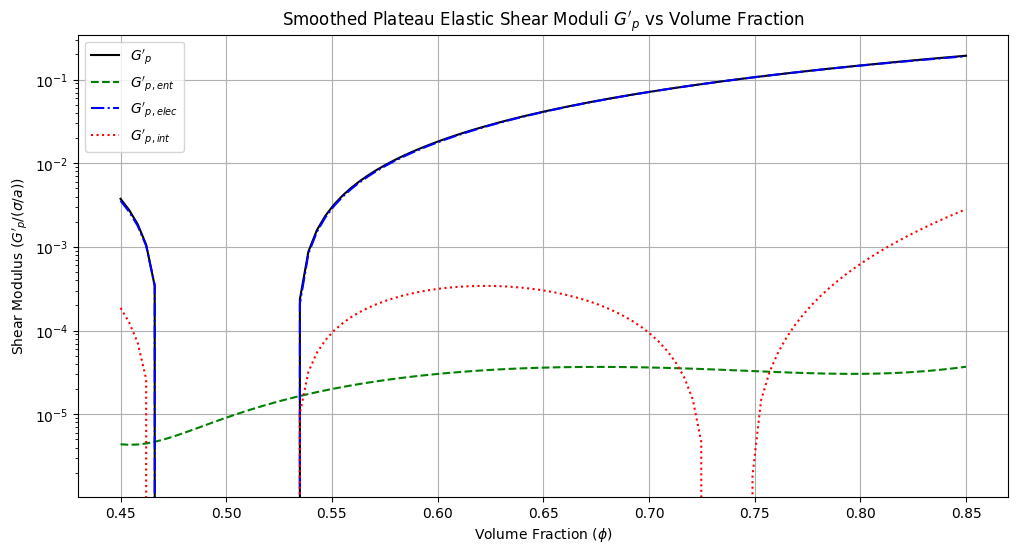

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d  # 用于平滑处理

# Apply Gaussian smoothing to each component
sigma = 2  # Smoothing strength

# 对每个分量的G'_p进行多项式拟合
def smooth_and_fit(phi_values, G_p_values, degree=4):
    """对数据进行拟合并返回拟合后的光滑曲线"""
    # 使用np.polyfit进行多项式拟合
    params = np.polyfit(phi_values, G_p_values, degree)
    # 使用拟合参数生成光滑的曲线
    G_p_smooth = np.polyval(params, phi_values)
    return G_p_smooth

# 获取原始数据并进行拟合
G_p_int_smooth = smooth_and_fit(phi_values, G_p_int, degree=4)
G_p_ent_smooth = smooth_and_fit(phi_values, G_p_ent, degree=4)
G_p_elec_smooth = smooth_and_fit(phi_values, G_p_elec, degree=4)

# 计算总的G'_p
G_p_tot_smooth = G_p_int_smooth + G_p_ent_smooth + G_p_elec_smooth

# Plot the smoothed G'_p components and total
plt.figure(figsize=(12, 6))
plt.plot(phi_values, G_p_tot_smooth, label='$G\'_p$', linestyle='solid', color='black')
plt.plot(phi_values, G_p_ent_smooth, label='$G\'_{p,ent}$ ', linestyle='dashed', color='green')
plt.plot(phi_values, G_p_elec_smooth, label='$G\'_{p,elec}$ ', linestyle='dashdot', color='blue')
plt.plot(phi_values, G_p_int_smooth, label='$G\'_{p,int}$ ', linestyle='dotted', color='red')
plt.yscale('log')
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Shear Modulus ($G\'_p / (\\sigma/a)$)')
plt.title('Smoothed Plateau Elastic Shear Moduli $G\'_p$ vs Volume Fraction')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_924/353069624.py:25: RuntimeWarning: invalid value encountered in log
  return -3 * k_B * T * np.log(phi_c + phi_d - phi - alpha * gamma**2)


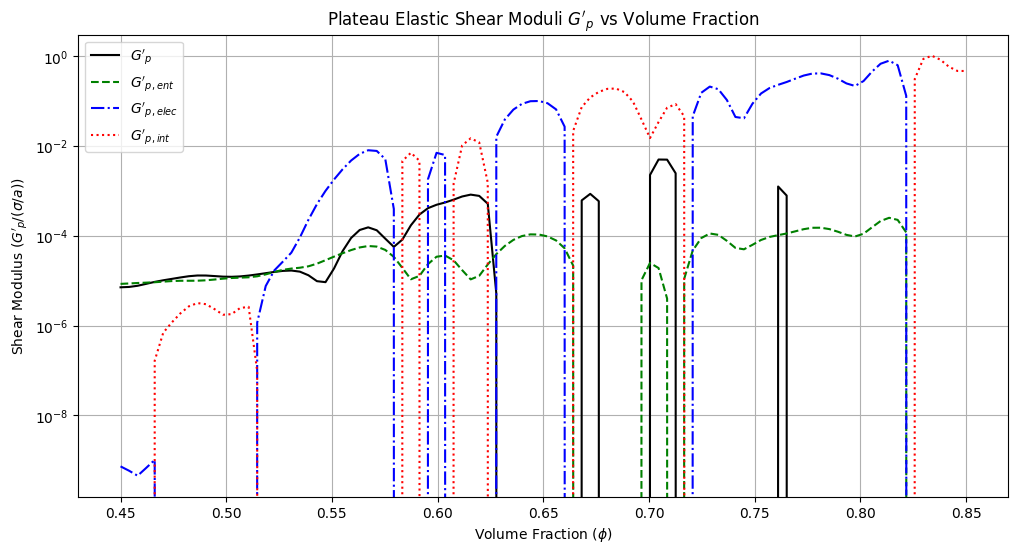

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, differential_evolution
from scipy.ndimage import gaussian_filter1d  # For smoothing

# Constants
k_B = 1.38e-23  # Boltzmann constant in J/K
T = 298  # Temperature in Kelvin
sigma = 0.0098  # Surface tension in J/m²
a = 270e-9  # Droplet radius in meters
xi = 0.15  # Dimensionless parameter
epsilon_r = 78.5  # Relative permittivity of water
epsilon_0 = 8.85e-12  # Permittivity of vacuum in F/m
psi_0 = 270e-3  # Surface potential in volts
lambda_D = 3.4e-9  # Debye length in meters
phi_c = 0.646  # Critical volume fraction
alpha = 0.85  # Shear effect parameter
V_drop = (4/3) * np.pi * a**3  # Droplet volume

# Free energy contributions in units of J (energy)
def F_int(phi_d):
    return 4 * np.pi * xi * sigma * (a**2) * (phi_d**2)

def F_ent(phi, phi_d, gamma):
    return -3 * k_B * T * np.log(phi_c + phi_d - phi - alpha * gamma**2)

def F_elec(phi_d, phi):
    h = 2 * a * ((phi_c + phi_d) ** (1/3) * phi ** (-1/3) - 1)
    return 2 * np.pi * (a**2) * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h / lambda_D) / h

# Total free energy per droplet in units of J (energy)
def F_tot(phi_d, phi, gamma):
    return F_int(phi_d) + F_ent(phi, phi_d, gamma) + F_elec(phi_d, phi)

# Minimize F_tot to find phi_d* for a given phi and gamma
def find_phi_d(phi, gamma):
    if phi <= phi_c:
        lower_bound = 0
    else:
        lower_bound = phi - phi_c
    bounds = [(lower_bound, phi_c)]
    
    def F_tot_wrapper(phi_d):
        return F_tot(phi_d[0], phi, gamma)
    
    result = differential_evolution(F_tot_wrapper, bounds=bounds)
    return result.x[0] if result.success else np.nan

# Quadratic fit function for F_tot as a function of gamma
def quadratic_fit(gamma, a, b, c):
    return a * gamma**2 + b * gamma + c

# Gamma range for fitting
gamma_range = np.linspace(0, 0.01, 50)

# Define phi values
phi_values = np.linspace(0.45, 0.85, 100)

# Initialize lists to store results
G_p_tot = []
G_p_ent = []
G_p_elec = []
G_p_int = []

# Loop over each phi value
for phi in phi_values:
    F_tot_gamma = []
    F_ent_gamma = []
    F_elec_gamma = []
    F_int_gamma = []
    
    # Loop over each gamma value to calculate F_tot, F_ent, F_elec, and F_int
    for gamma in gamma_range:
        # Find phi_d* for each gamma value dynamically
        phi_d_star = find_phi_d(phi, gamma)
        
        # Check if phi_d_star is valid (not NaN or inf)
        if np.isnan(phi_d_star) or np.isinf(phi_d_star):
            continue  # Skip invalid values
        
        # Calculate F_tot, F_ent, F_elec, and F_int for the current gamma
        F_tot_val = F_tot(phi_d_star, phi, gamma)
        F_ent_val = F_ent(phi, phi_d_star, gamma)
        F_elec_val = F_elec(phi_d_star, phi)
        F_int_val = F_int(phi_d_star)
        
        # Ensure no invalid values are included in the result
        if any(np.isnan([F_tot_val, F_ent_val, F_elec_val, F_int_val])) or any(np.isinf([F_tot_val, F_ent_val, F_elec_val, F_int_val])):
            continue
        
        # Append valid values to the lists
        F_tot_gamma.append(F_tot_val)
        F_ent_gamma.append(F_ent_val)
        F_elec_gamma.append(F_elec_val)
        F_int_gamma.append(F_int_val)
    
    # Perform quadratic fitting if we have enough valid data points
    if len(F_tot_gamma) > 3:  # Ensure we have enough points for fitting
        popt_tot, _ = curve_fit(quadratic_fit, gamma_range[:len(F_tot_gamma)], F_tot_gamma)
        popt_ent, _ = curve_fit(quadratic_fit, gamma_range[:len(F_ent_gamma)], F_ent_gamma)
        popt_elec, _ = curve_fit(quadratic_fit, gamma_range[:len(F_elec_gamma)], F_elec_gamma)
        popt_int, _ = curve_fit(quadratic_fit, gamma_range[:len(F_int_gamma)], F_int_gamma)
        
        # The 'a' parameter is the second derivative (curvature) at gamma = 0
        curvature_tot = popt_tot[0]
        curvature_ent = popt_ent[0]
        curvature_elec = popt_elec[0]
        curvature_int = popt_int[0]
        
        # Calculate G'_p values in units of G'_p / (σ/a)
        G_p_tot.append((phi / V_drop) * curvature_tot / (sigma / a))
        G_p_ent.append((phi / V_drop) * curvature_ent / (sigma / a))
        G_p_elec.append((phi / V_drop) * curvature_elec / (sigma / a))
        G_p_int.append((phi / V_drop) * curvature_int / (sigma / a))

# Apply Gaussian smoothing to reduce fluctuations
G_p_tot_smooth = gaussian_filter1d(G_p_tot, sigma=2)
G_p_ent_smooth = gaussian_filter1d(G_p_ent, sigma=2)
G_p_elec_smooth = gaussian_filter1d(G_p_elec, sigma=2)
G_p_int_smooth = gaussian_filter1d(G_p_int, sigma=2)

# Plot G'_p values (log scale)
plt.figure(figsize=(12, 6))
plt.plot(phi_values, G_p_tot_smooth, label='$G\'_p$', linestyle='solid', color='black')
plt.plot(phi_values, G_p_ent_smooth, label='$G\'_{p,ent}$', linestyle='dashed', color='green')
plt.plot(phi_values, G_p_elec_smooth, label='$G\'_{p,elec}$', linestyle='dashdot', color='blue')
plt.plot(phi_values, G_p_int_smooth, label='$G\'_{p,int}$', linestyle='dotted', color='red')
plt.yscale('log')
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Shear Modulus ($G\'_p / (\\sigma/a)$)')
plt.title('Plateau Elastic Shear Moduli $G\'_p$ vs Volume Fraction')
plt.legend()
plt.grid(True)
plt.show()


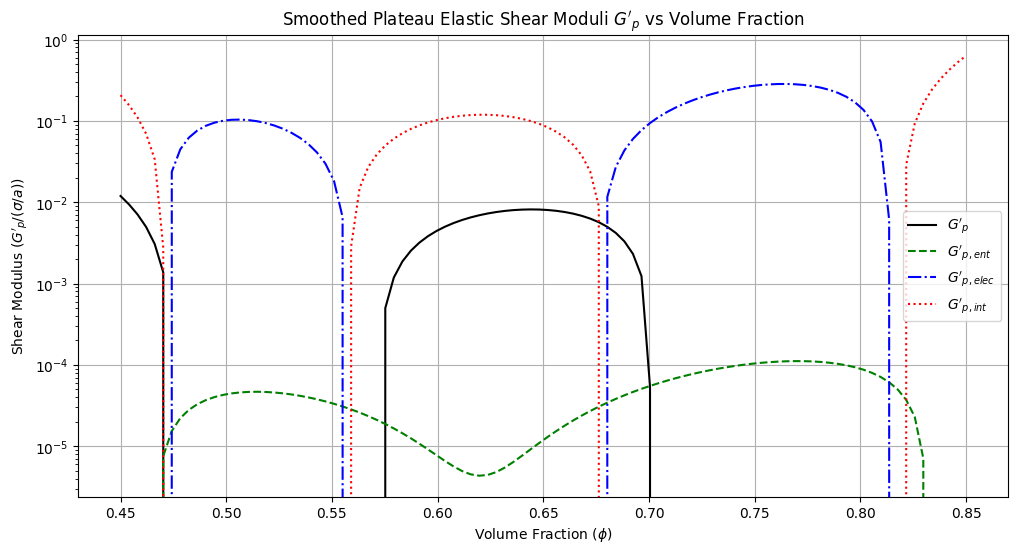

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d  # 用于平滑处理

# Apply Gaussian smoothing to each component
sigma = 2  # Smoothing strength

# 对每个分量的G'_p进行多项式拟合
def smooth_and_fit(phi_values, G_p_values, degree=4):
    """对数据进行拟合并返回拟合后的光滑曲线"""
    # 使用np.polyfit进行多项式拟合
    params = np.polyfit(phi_values, G_p_values, degree)
    # 使用拟合参数生成光滑的曲线
    G_p_smooth = np.polyval(params, phi_values)
    return G_p_smooth

# 获取原始数据并进行拟合
G_p_int_smooth = smooth_and_fit(phi_values, G_p_int, degree=4)
G_p_ent_smooth = smooth_and_fit(phi_values, G_p_ent, degree=4)
G_p_elec_smooth = smooth_and_fit(phi_values, G_p_elec, degree=4)

# 计算总的G'_p
G_p_tot_smooth = G_p_int_smooth + G_p_ent_smooth + G_p_elec_smooth

# Plot the smoothed G'_p components and total
plt.figure(figsize=(12, 6))
plt.plot(phi_values, G_p_tot_smooth, label='$G\'_p$', linestyle='solid', color='black')
plt.plot(phi_values, G_p_ent_smooth, label='$G\'_{p,ent}$ ', linestyle='dashed', color='green')
plt.plot(phi_values, G_p_elec_smooth, label='$G\'_{p,elec}$ ', linestyle='dashdot', color='blue')
plt.plot(phi_values, G_p_int_smooth, label='$G\'_{p,int}$ ', linestyle='dotted', color='red')
plt.yscale('log')
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Shear Modulus ($G\'_p / (\\sigma/a)$)')
plt.title('Smoothed Plateau Elastic Shear Moduli $G\'_p$ vs Volume Fraction')
plt.legend()
plt.grid(True)
plt.show()


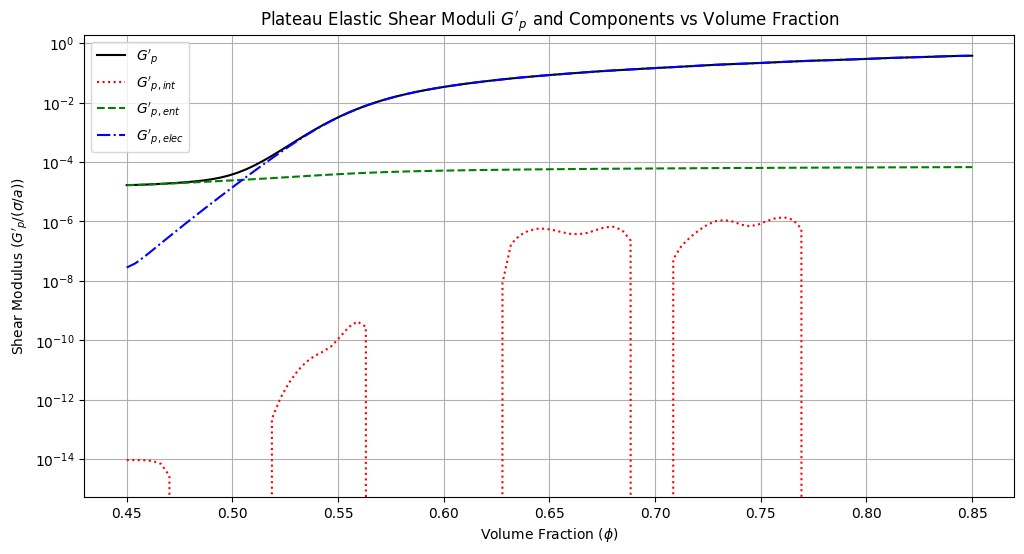

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, differential_evolution
from scipy.ndimage import gaussian_filter1d  

# Constants
k_B = 1.38e-23  # Boltzmann constant in J/K
T = 298  # Temperature in Kelvin
sigma = 0.0098  # Surface tension in J/m²
a = 270e-9  # Droplet radius in meters
xi = 0.15  # Dimensionless parameter
epsilon_r = 78.5  # Relative permittivity of water
epsilon_0 = 8.85e-12  # Permittivity of vacuum in F/m
psi_0 = 270e-3  # Surface potential in volts
lambda_D = 3.4e-9  # Debye length in meters
phi_c = 0.646  # Critical volume fraction
alpha = 0.85  # Shear effect parameter
V_drop = (4/3) * np.pi * a**3  # Droplet volume

# Free energy components (units of J)
def F_int(phi_d):
    return 4 * np.pi * xi * sigma * (a**2) * (phi_d**2)

def F_ent(phi, phi_d, gamma):
    return -3 * k_B * T * np.log(phi_c + phi_d - phi - alpha * gamma**2)

def F_elec(phi_d, phi, gamma):
    h = 2 * (phi_c ** (1/3)) * a * (phi ** (-1/3) - (phi_c + phi_d - alpha * gamma**2) ** (-1/3))
    return 2 * np.pi * (a**2) * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h / lambda_D) / h

def F_tot(phi_d, phi, gamma):
    return F_int(phi_d) + F_ent(phi, phi_d, gamma) + F_elec(phi_d, phi, gamma)

# Minimize F_tot to find phi_d* and gamma for a given phi
def find_phi_d_and_gamma(phi):
    if phi <= phi_c:
        lower_bound_phi_d = 0
    else:
        lower_bound_phi_d = phi - phi_c
    bounds = [(lower_bound_phi_d, phi_c), (0, 0.01)]  # gamma 范围在 0 到 0.01 之间

    def F_tot_wrapper(params):
        phi_d, gamma = params
        return F_tot(phi_d, phi, gamma)

    result = differential_evolution(F_tot_wrapper, bounds=bounds, seed=10, maxiter=100)
    
    return result.x if result.success else (np.nan, np.nan)

# Quadratic fit function
def quadratic_fit(gamma, a, b, c):
    return a * gamma**2 + b * gamma + c

# Volume fraction values
phi_values = np.linspace(0.45, 0.85, 100)  

# Initialize arrays for storing G'_p contributions
G_p_tot = []  
G_p_int = []  
G_p_ent = []  
G_p_elec = []  

# Calculate G'_p and its components
for phi in phi_values:
    # Find optimal phi_d and gamma using total free energy
    phi_d_opt, gamma_opt = find_phi_d_and_gamma(phi)
    
    if np.isnan(phi_d_opt) or np.isnan(gamma_opt):
        continue  # Skip if optimization failed
    
    # 使用固定范围的 gamma 进行拟合
    gamma_range = np.linspace(0, 0.01, 100)  # 固定从 0 到 0.01 的 gamma 范围
    
    # Total free energy fitting
    F_tot_gamma = [F_tot(phi_d_opt, phi, gamma) for gamma in gamma_range]
    popt_tot, _ = curve_fit(quadratic_fit, gamma_range, F_tot_gamma)
    curvature_tot = popt_tot[0] * 2  # Multiply by 2 to get the actual second derivative
    G_p_tot.append((phi / V_drop) * curvature_tot / (sigma / a))
    
    # Interface free energy fitting (using the same phi_d_opt and gamma_opt)
    F_int_gamma = [F_int(phi_d_opt) for gamma in gamma_range]
    popt_int, _ = curve_fit(quadratic_fit, gamma_range, F_int_gamma)
    curvature_int = popt_int[0] * 2  # Multiply by 2 to get the actual second derivative
    G_p_int.append((phi / V_drop) * curvature_int / (sigma / a))
    
    # Entropic free energy fitting (using the same phi_d_opt and gamma_opt)
    F_ent_gamma = [F_ent(phi, phi_d_opt, gamma) for gamma in gamma_range]
    popt_ent, _ = curve_fit(quadratic_fit, gamma_range, F_ent_gamma)
    curvature_ent = popt_ent[0] * 2
    G_p_ent.append((phi / V_drop) * curvature_ent / (sigma / a))
    
    # Electrostatic free energy fitting (using the same phi_d_opt and gamma_opt)
    F_elec_gamma = [F_elec(phi_d_opt, phi, gamma) for gamma in gamma_range]
    popt_elec, _ = curve_fit(quadratic_fit, gamma_range, F_elec_gamma)
    curvature_elec = popt_elec[0] * 2
    G_p_elec.append((phi / V_drop) * curvature_elec / (sigma / a))

# Smooth the results for plotting
G_p_tot_smooth = gaussian_filter1d(G_p_tot, sigma=2)
G_p_int_smooth = gaussian_filter1d(G_p_int, sigma=2)
G_p_ent_smooth = gaussian_filter1d(G_p_ent, sigma=2)
G_p_elec_smooth = gaussian_filter1d(G_p_elec, sigma=2)

# Plot the results for all components
plt.figure(figsize=(12, 6))
plt.plot(phi_values[:len(G_p_tot_smooth)], G_p_tot_smooth, label='$G\'_p$', linestyle='solid', color='black')
plt.plot(phi_values[:len(G_p_int_smooth)], G_p_int_smooth, label='$G\'_{p,int}$', linestyle='dotted', color='red')
plt.plot(phi_values[:len(G_p_ent_smooth)], G_p_ent_smooth, label='$G\'_{p,ent}$', linestyle='dashed', color='green')
plt.plot(phi_values[:len(G_p_elec_smooth)], G_p_elec_smooth, label='$G\'_{p,elec}$', linestyle='dashdot', color='blue')
plt.yscale('log')
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Shear Modulus ($G\'_p / (\\sigma/a)$)')
plt.title('Plateau Elastic Shear Moduli $G\'_p$ and Components vs Volume Fraction')
plt.legend()
plt.grid(True)
plt.show()


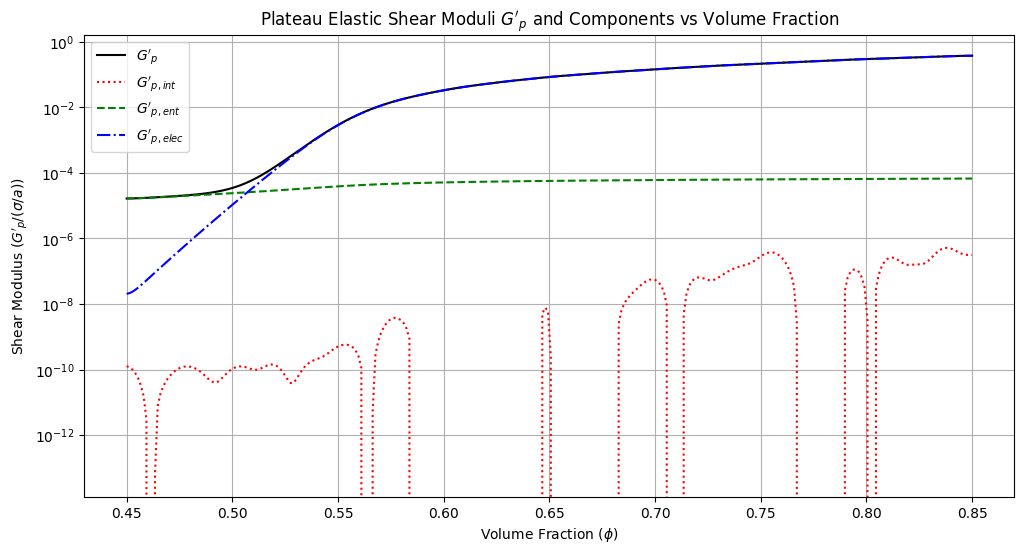

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, differential_evolution
from scipy.ndimage import gaussian_filter1d  

# Constants
k_B = 1.38e-23  # Boltzmann constant in J/K
T = 298  # Temperature in Kelvin
sigma = 0.0098  # Surface tension in J/m²
a = 270e-9  # Droplet radius in meters
xi = 0.15  # Dimensionless parameter
epsilon_r = 78.5  # Relative permittivity of water
epsilon_0 = 8.85e-12  # Permittivity of vacuum in F/m
psi_0 = 270e-3  # Surface potential in volts
lambda_D = 3.4e-9  # Debye length in meters
phi_c = 0.646  # Critical volume fraction
alpha = 0.85  # Shear effect parameter
V_drop = (4/3) * np.pi * a**3  # Droplet volume

# Free energy components (units of J)
def F_int(phi_d):
    return 4 * np.pi * xi * sigma * (a**2) * (phi_d**2)

def F_ent(phi, phi_d, gamma):
    return -3 * k_B * T * np.log(phi_c + phi_d - phi - alpha * gamma**2)

def F_elec(phi_d, phi, gamma):
    h = 2 * (phi_c ** (1/3)) * a * (phi ** (-1/3) - (phi_c + phi_d - alpha * gamma**2) ** (-1/3))
    return 2 * np.pi * (a**2) * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h / lambda_D) / h

def F_tot(phi_d, phi, gamma):
    return F_int(phi_d) + F_ent(phi, phi_d, gamma) + F_elec(phi_d, phi, gamma)

# Minimize F_tot to find phi_d* and gamma for a given phi
def find_phi_d_and_gamma(phi):
    if phi <= phi_c:
        lower_bound_phi_d = 0
    else:
        lower_bound_phi_d = phi - phi_c
    bounds = [(lower_bound_phi_d, phi_c), (0, 0.01)]  # gamma 范围在 0 到 0.01 之间

    def F_tot_wrapper(params):
        phi_d, gamma = params
        return F_tot(phi_d, phi, gamma)

    result = differential_evolution(F_tot_wrapper, bounds=bounds, seed=10, maxiter=100)
    
    return result.x if result.success else (np.nan, np.nan)

# Quadratic fit function
def quadratic_fit(gamma, a, b, c):
    return a * gamma**2 + b * gamma + c

# 增加数据点密度
phi_values = np.linspace(0.45, 0.85, 300)  # 增加 phi 的分辨率

# Initialize arrays for storing G'_p contributions
G_p_tot = []  
G_p_ent = []  
G_p_elec = []  
G_p_int = []  # 通过减法求得的界面自由能

# Calculate G'_p and its components
for phi in phi_values:
    # Find optimal phi_d and gamma using total free energy
    phi_d_opt, gamma_opt = find_phi_d_and_gamma(phi)
    
    if np.isnan(phi_d_opt) or np.isnan(gamma_opt):
        continue  # Skip if optimization failed
    
    # 使用固定范围的 gamma 进行拟合
    gamma_range = np.linspace(0, 0.01, 100)  # 固定从 0 到 0.01 的 gamma 范围
    
    # Total free energy fitting
    F_tot_gamma = [F_tot(phi_d_opt, phi, gamma) for gamma in gamma_range]
    popt_tot, _ = curve_fit(quadratic_fit, gamma_range, F_tot_gamma)
    curvature_tot = popt_tot[0] * 2  # Multiply by 2 to get the actual second derivative
    G_p_tot.append((phi / V_drop) * curvature_tot / (sigma / a))
    
    # Entropic free energy fitting (using the same phi_d_opt and gamma_opt)
    F_ent_gamma = [F_ent(phi, phi_d_opt, gamma) for gamma in gamma_range]
    popt_ent, _ = curve_fit(quadratic_fit, gamma_range, F_ent_gamma)
    curvature_ent = popt_ent[0] * 2
    G_p_ent.append((phi / V_drop) * curvature_ent / (sigma / a))
    
    # Electrostatic free energy fitting (using the same phi_d_opt and gamma_opt)
    F_elec_gamma = [F_elec(phi_d_opt, phi, gamma) for gamma in gamma_range]
    popt_elec, _ = curve_fit(quadratic_fit, gamma_range, F_elec_gamma)
    curvature_elec = popt_elec[0] * 2
    G_p_elec.append((phi / V_drop) * curvature_elec / (sigma / a))
    
    # Calculate G'_{p,int} using subtraction
    G_p_int.append(G_p_tot[-1] - G_p_ent[-1] - G_p_elec[-1])

# 增强平滑处理，增加 sigma 值
G_p_tot_smooth = gaussian_filter1d(G_p_tot, sigma=4)  # 增强平滑度
G_p_int_smooth = gaussian_filter1d(G_p_int, sigma=4)
G_p_ent_smooth = gaussian_filter1d(G_p_ent, sigma=4)
G_p_elec_smooth = gaussian_filter1d(G_p_elec, sigma=4)

# Plot the results for all components
plt.figure(figsize=(12, 6))
plt.plot(phi_values[:len(G_p_tot_smooth)], G_p_tot_smooth, label='$G\'_p$', linestyle='solid', color='black')
plt.plot(phi_values[:len(G_p_int_smooth)], G_p_int_smooth, label='$G\'_{p,int}$', linestyle='dotted', color='red')
plt.plot(phi_values[:len(G_p_ent_smooth)], G_p_ent_smooth, label='$G\'_{p,ent}$', linestyle='dashed', color='green')
plt.plot(phi_values[:len(G_p_elec_smooth)], G_p_elec_smooth, label='$G\'_{p,elec}$', linestyle='dashdot', color='blue')
plt.yscale('log')
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Shear Modulus ($G\'_p / (\\sigma/a)$)')
plt.title('Plateau Elastic Shear Moduli $G\'_p$ and Components vs Volume Fraction')
plt.legend()
plt.grid(True)
plt.show()
